# Topic 18: Introduction to Linear Regression

# Topic 18: Introduction to Linear Regression

In [ ]:
4

## Statistical Learning Theory

In Statistical Learning Theory, the main idea is to **construct a model** to draw certain conclusions from data, and next, to **use this model** to make predictions.


### Model vs Algorithm

You might've heard the phrase "training a model". 

A model *trains* via its algorithm, and you can think of an algorithm as a series of steps that a model takes to train. So while the best model for your data is a regression that has an equation in the form: $y = β_0 + β_1x_1 + …$ (where $y$ is your predicted value, the $x$'s are your variables and your $β$s are your parameters/coefficients), the algorithm is the process of choosing the right values for your parameters $β_0$ and $β_1$.

### Data

In the context of Statistical learning, there are two main types of data:

* **Dependent variables**: data that can be controlled directly (other names: outcome variables, target variables, response variables) 
* **Independent variables**: data that cannot be controlled directly (other names: predictor variables, input variables, explanatory variables, features)

In models, the independent variable(s) are the variables that will affect (or will lead to a change in) the dependent variable(s).

Conventionally, the independent variable goes on the x-axis, or the horizontal axis. This is an example where we look at someone's income depending on their age. Below, you see a scatter plot where age is the independent variable, and income is the dependent variable. In this setting, **we want to study if age has some effect on annual income**.

<img  src ="images/scatter_age_income.png" width="500">



## A Linear Regression

A statistical model defines a **relationship** between a dependent and an independent variable. 

<img src="images/scatter_line_age_income.png" width="600"> 


For the plot we see above, the relationship between age and income can be shown using a **straight line** connecting all the individual observations in the data. So this line here would be our **model** as shown in the image below. 

This "straight line going through our data" is our Linear Regression model!

$$y = \beta_0 + \beta_1  x $$ 

y: dependent variable

x: independent variable

β: parameters/coefficients

### Choosing the Best-Fit Line

There is more than one method for choosing the right parameters for a Linear Regression. You might come across methods using matrix multiplication, covariances, or gradient descent. However, the metric that each method uses to determine the **best line** is the same -- **Least Squared Error**. That's where the term OLS (ordinary least squares) comes from.

<img src="./images/new_loss.png" width="400">

Every model has an associated **cost function** that its algorithm uses to learn the best parameters.

<img src="./images/ssresid.png" width="800">

## How Well-Fit is the Best-Fit?

A metric to determine **how well the line fits our data** is the **coefficient of determination** or $R^2$ (R-squared).

<img src="images/linreg_rsq.png" width="600">

The mathematical formula to calculate R-Squared for a linear regression line is in terms of **squared errors** for the fitted model and the baseline model. It's calculated as :

$$ \large R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$

* $SS_{RES}$ (also called RSS) is the **Residual** sum of squared errors of our regression model also known as **$SSE$** (Sum of Squared Errors). $SS_{RES}$ is the squared difference between $y$ and $\hat y$. For the one highlighted observation in our graph above, the $SS_{RES}$ is denoted by the red arrow. This part of the error is not explained by our model.


* $SS_{TOT}$ (also called TSS) is the **Total** sum of squared error. $SS_{TOT}$ is the squared difference between $y$ and $\overline y$. For the one highlighted observation in our graph above, the $SS_{TOT}$ is denoted by the orange arrow.

An R-squared value of say 0.85 can be described conceptually as: 

> ***85% of the variations in dependent variable $y$ are explained by the independent variable in our model.***

# Our First Regression!

We'll start with Simple Linear Regression, which is a model that uses just **one** independent variable to predict your dependent variable.

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [8]:
df = pd.read_csv('heightWeight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


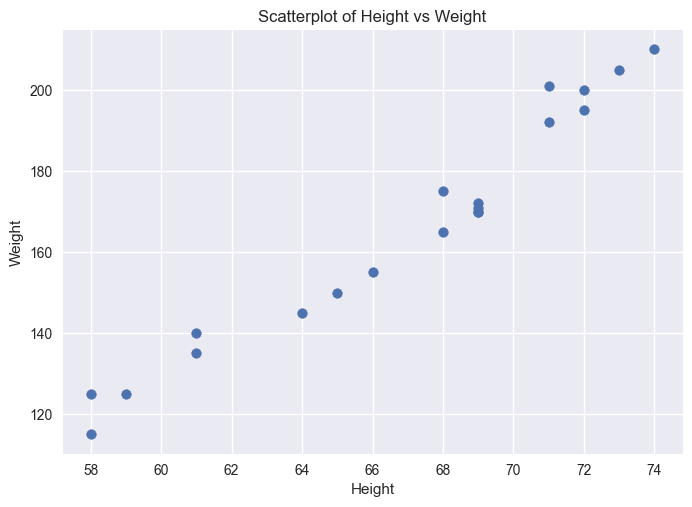

In [4]:
plt.scatter(df.height, df.weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatterplot of Height vs Weight");

In [5]:
# setting up OLS Linear Regression with Statsmodels

f = 'weight~height'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.35e-13
Time:                        16:50:11   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Here is a brief description of these measures:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit: 

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

The second table shows the coefficient report: 

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

The third table shows information about the residuals, autocorrelation, and multicollinearity: 

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: Provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).

## Hypothesis Testing in Regression 


> **Null Hypothesis ($H_0$)**: There is no relationship between the independent variable and the dependent variable

> **Alternative Hypothesis ($H_a$):** There is "some" relationship between the independent variable and the dependent variable

If we reject the null hypothesis, it means that we believe that there is some sort of relationship 

If we fail to reject the null hypothesis, it means that we believe that  there is no _significant_ relationship between dependent and independent, and that our slope parameter $m$ in $y= mx+c$ is not _significantly_ different from zero. 


## p-value as a level of statistical significance

When performing statistical analyses, rejecting or not rejecting a null hypothesis always goes along with an associated **significance level** or **p-value**.

> The p-value represents a **probability of observing your results (or something more extreme) given that the null hypothesis is true**
 
Applied to a regression model, p-values associated with coefficients estimates indicate the probability of observing the associated coefficient given that the null-hypothesis is true. As a result, very small p-values indicate that coefficients are **statistically significant**. A very commonly used cut-off value for the p-value is 0.05. If your p-value is smaller than 0.05, you would say:

> The parameter is statistically significant at $\alpha$ level 0.05. 

Just like for statistical significance, rejecting the null hypothesis at an alpha level of 0.05 is the equivalent for having a 95% confidence interval around the coefficient that does not include zero. In short

> The p-value represents the probability that the coefficient is actually zero. 

# Assumptions for Linear Regression

Regression is a parametric technique, which means that it uses parameters learned from the data. Because of that, certain assumptions must be made. These assumptions define the complete scope of regression analysis and it is **mandatory** that the underlying data fulfills these assumptions. If violated, regression makes biased and unreliable predictions. Luckily, we have measures to check for these assumptions.

## 1. Linearity

> The linearity assumptions requires that there is a **linear relationship** between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. 


<img src="images/lin_2.png" width="800">


As shown above, If we try to fit a linear model to a non-linear data set, OLS will fail to capture the trend mathematically, resulting in an inaccurate relationship. This will also result in erroneous predictions on an unseen data set.  

>The linearity assumption can best be tested with scatter plots 

For non-linear relationships, you can use non-linear mathematical functions to fit the data e.g. polynomial and exponential functions. You'll come across these later. 

**Note: As an extra measure, it is also important to check for outliers as the presence of outliers in the data can have a major impact on the model.**

<img src="images/outliers.png" width="600">


In the above example, we can see that an outlier prohibits the model to estimate the true relationship between variables by introducing bias. 

## 2. Normality 


> The normality assumption states that the **model residuals** should follow a normal distribution

Note that the normality assumption talks about the **model residuals** and _not_ about the distributions of the **variables**! In general, data scientists will often check the distributions of the variables as well. Keep in mind that the normality assumption is mandatory for the residuals, and it is useful to check normality of your variables to check for weirdness (more on data distributions later), but OLS works fine for non-normal data distributions in the context of prediction. 

The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots. 

### Histograms
We have already seen quite a few histograms and also know how to build them. You can use histograms to check the errors generated by the model and see if the plot shows a so-called "normal distribution" (bell curve shape). As the error term follows a normal distribution, we can develop better confidence in the results and calculate the statistical significance. An example of a regression error histogram is shown below:

<img src="images/inhouse_histo.png" width="800">

### Q-Q Plots

>In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

The Q-Q plot (quantile-quantile plot) is used to help assess if a sample comes from a known distribution such as a normal distribution. For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption. Remember that this is just a visual check, so the interpretation remains subjective. However, it is a good first check to see the overall shape of your data against the required distribution. If you can reject normality through Q-Q plots, you have saved yourself from a lot of statistical testing. You have to be careful, however, when deciding that data is totally normal just by looking at a Q-Q plot.


Below, you can find a few examples of comparing histograms and corresponding plots. You can see how the quantiles of normal data appear as a straight line along the diagonal when plotted against a standard normal distribution's quantiles. The skewness and kurtosis of data can also be inspected this way  

<img src="images/inhouse_qq_plots.png" width="600">

In the context of normality of residuals, Q-Q plots can help you validate the assumption of normally distributed residuals. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution.[Here is a good article](https://data.library.virginia.edu/understanding-q-q-plots/) explaining the interpretation of Q-Q plots in detail. 

Normality can also be checked with goodness of fit tests such as the Kolmogorov-Smirnov test.  When the data is not normally distributed, there are some ways to fix that, such as a non-linear transformation (e.g., log-transformation).


C:\Users\USER PC\AppData\Local\Temp\ipykernel_31432\2992656137.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


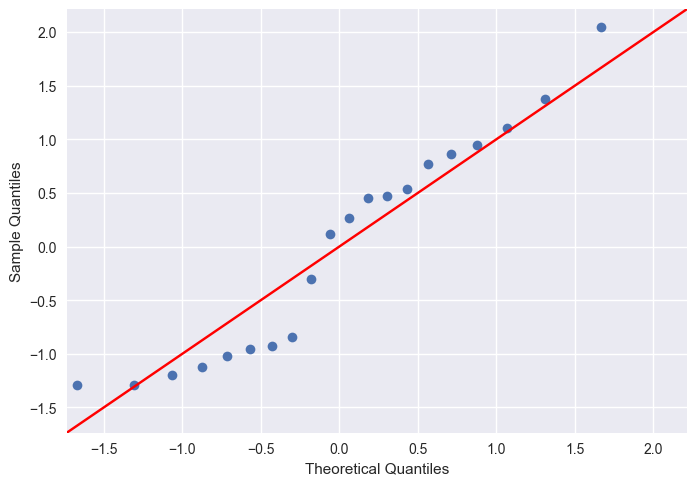

In [6]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## 3. Homoscedasticity 

> _Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases. 

The inverse of heteroscedasticity is _homoscedasticity_, which indicates that a dependent variable's variability is equal across values of the independent variable. **Homoscedasticity is the third assumption necessary when creating a linear regression model.**

<img src="images/homo_2.png" width="700">

A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).  The scatter plots shown here are examples of data that are heteroscedastic (except the plot far right). You can also use significance tests like Breusch-Pagan / Cook-Weisberg test or White general test to detect this phenomenon. Remember that, if these tests give you a p-value < 0.05, the null hypothesis can rejected, and you can assume the data is heteroscedastic.

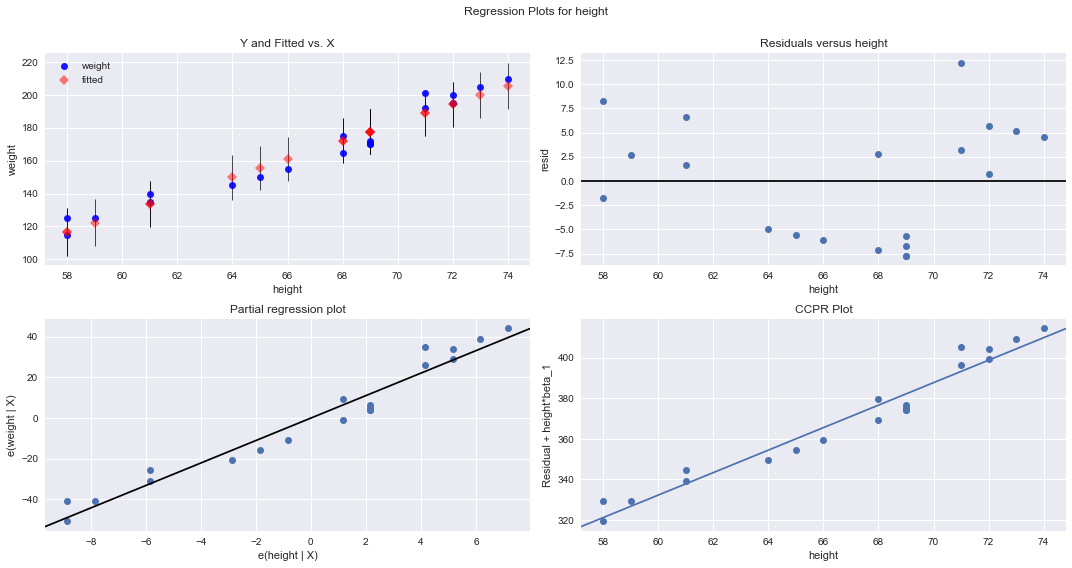

In [8]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()

For the four graphs we see above:

* The **Y and Fitted vs. X** graph plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated, i.e., when one variable increases the other increases.

* The **Residuals versus height** graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

* The **Partial regression plot** shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. You'll later learn how this same graph changes when you add more variables.

* The **Component and Component Plus Residual (CCPR)** plot is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the weight.